### **PROJECT 1 PROPOSAL LEVEL 1**


**Idea: Exploratory Data Analysis (EDA) on Retail Sales Data**


 **Description:**


 In this project, you will work with a dataset containing information about retail sales. The goal is to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can help the retail business make informed decisions.


 **Dataset:-** https://www.kaggle.com/datasets/atharvasoundankar/fashion-retail-sales?select=Fashion_Retail_Sales.csv


 **Key Concepts and Challenges:**


 1.Data Loading and Cleaning: Load the retail sales dataset.
 
 
 2.Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).
 
 
 3.Time Series Analysis: Analyze sales trends over time using time series techniques.
 
 
 4.Customer and Product Analysis: Analyze customer demographics and purchasing behavior.
 
 
 5.Visualization: Present insights through bar charts, line plots, and heatmaps.
 
 
 6.Recommendations: Provide actionable recommendations based on the EDA.

In [29]:
# Install and Import Required Libraries for EDA
# pip install pandas matplotlib seaborn - if not installed 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [30]:
# Load the fashion_retail_sales.csv dataset 
df = pd.read_csv("fashion_retail_sales.csv") 

In [31]:
# Display basic information
print(" Dataset Info:")
print(df.info())
print("\n First 5 rows:")
print(df.head())

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB
None

 First 5 rows:
   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    05-02-2023   
1                   4115          Tunic                 2456.0    11-07-2023   
2                   4019       Tank Top                 2102.0    23-03-2023   
3                   4097       Leggings                 31

In [32]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


In [33]:
# --- Data Cleaning ---
# Convert 'Date Purchase' to datetime format
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], format='%d-%m-%Y', errors='coerce')

In [34]:
# Handling missing Purchase Amount and Review Rating
df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mean(), inplace=True)
df['Review Rating'].fillna(df['Review Rating'].mode()[0], inplace=True)

# Drop rows with invalid dates
df = df.dropna(subset=['Date Purchase'])

In [35]:
# Count the number of unique customers
unique_customers = df['Customer Reference ID'].nunique()
avg_purchase_per_customer = df.groupby('Customer Reference ID')['Purchase Amount (USD)'].mean()

# Display the number of unique customers
print(f"\n🧾 Total Unique Customers: {unique_customers}")

# Display average purchase amount for the first 5 customers
print("\n💵 Average Purchase Amount per Customer (Sample):")
print(avg_purchase_per_customer.head())



🧾 Total Unique Customers: 166

💵 Average Purchase Amount per Customer (Sample):
Customer Reference ID
3957    115.723532
3958     90.206473
3959    114.414975
3960    105.784970
3961    117.934050
Name: Purchase Amount (USD), dtype: float64


In [36]:
# --- Descriptive Statistics ---
print("\n Descriptive Stats:")
print(df.describe())


 Descriptive Stats:
       Customer Reference ID  Purchase Amount (USD)  \
count            3400.000000            3400.000000   
mean             4039.660588             156.709818   
min              3957.000000              10.000000   
25%              3997.000000              70.000000   
50%              4040.000000             132.000000   
75%              4081.000000             156.709818   
max              4122.000000            4932.000000   
std                48.122583             377.295576   

                       Date Purchase  Review Rating  
count                           3400    3400.000000  
mean   2023-04-01 01:40:22.588235520       3.103971  
min              2022-10-02 00:00:00       1.000000  
25%              2022-12-31 00:00:00       2.100000  
50%              2023-04-03 00:00:00       3.200000  
75%              2023-07-02 00:00:00       4.100000  
max              2023-10-01 00:00:00       5.000000  
std                              NaN       1.146533

C:\Users\ittyavira\AppData\Local\Temp\ipykernel_15052\3749548393.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette="magma")


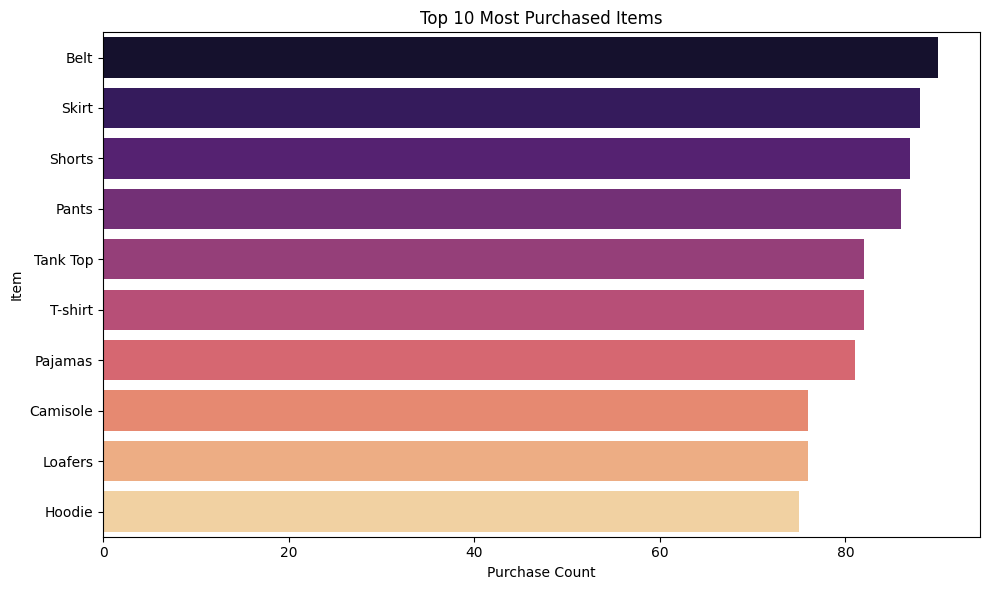

In [37]:
# --- Top Items Purchased ---
top_items = df['Item Purchased'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette="magma")
plt.title("Top 10 Most Purchased Items")
plt.xlabel("Purchase Count")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

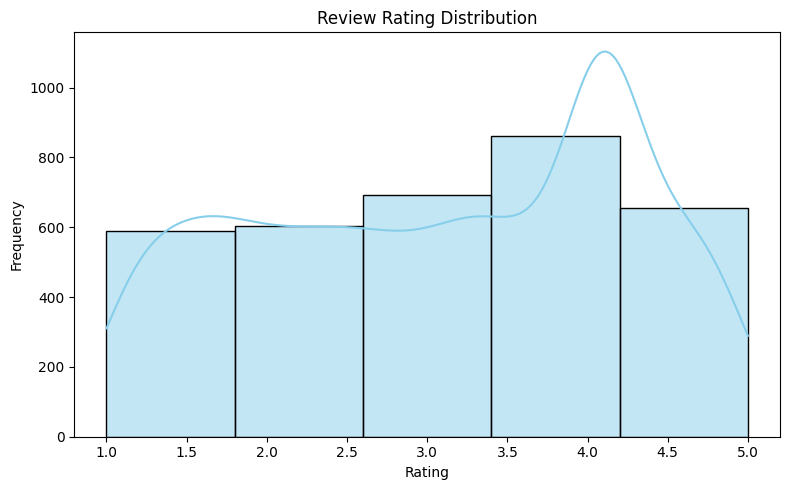

In [38]:
# --- Review Rating Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Review Rating'], bins=5, kde=True, color='skyblue')
plt.title("Review Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\ittyavira\AppData\Local\Temp\ipykernel_15052\2722979483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Payment Method', order=df['Payment Method'].value_counts().index, palette='viridis')


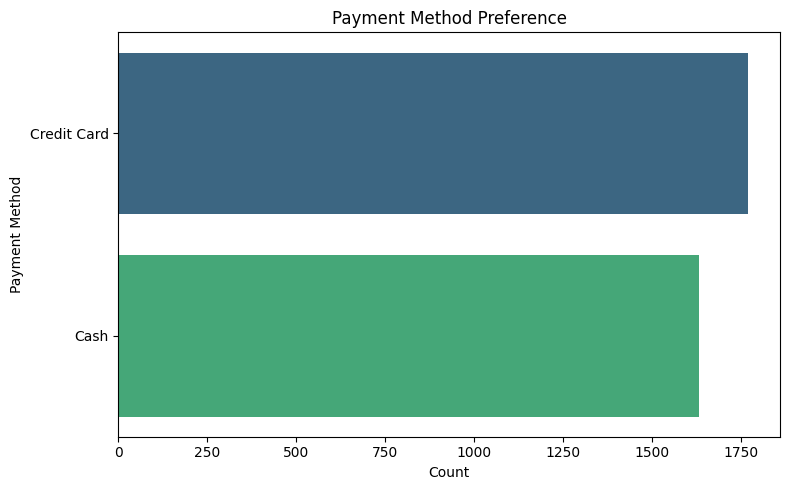

In [39]:
# --- Payment Method Count ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Payment Method', order=df['Payment Method'].value_counts().index, palette='viridis')
plt.title("Payment Method Preference")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

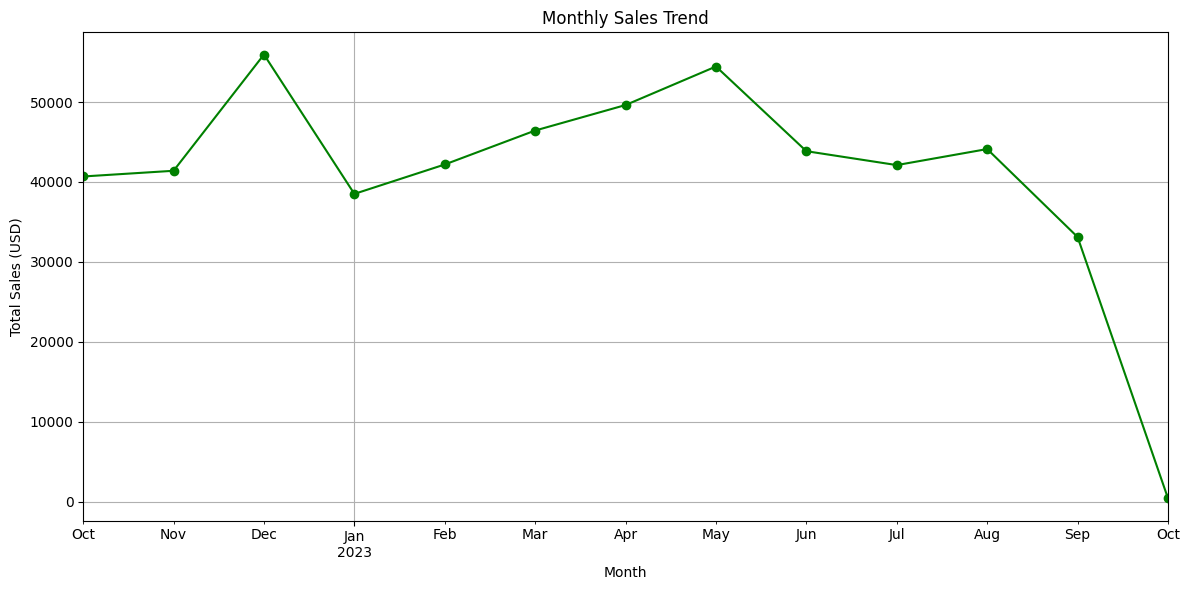

In [40]:
# --- Time Series Sales Trend ---
df['Month'] = df['Date Purchase'].dt.to_period("M")
monthly_sales = df.groupby('Month')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

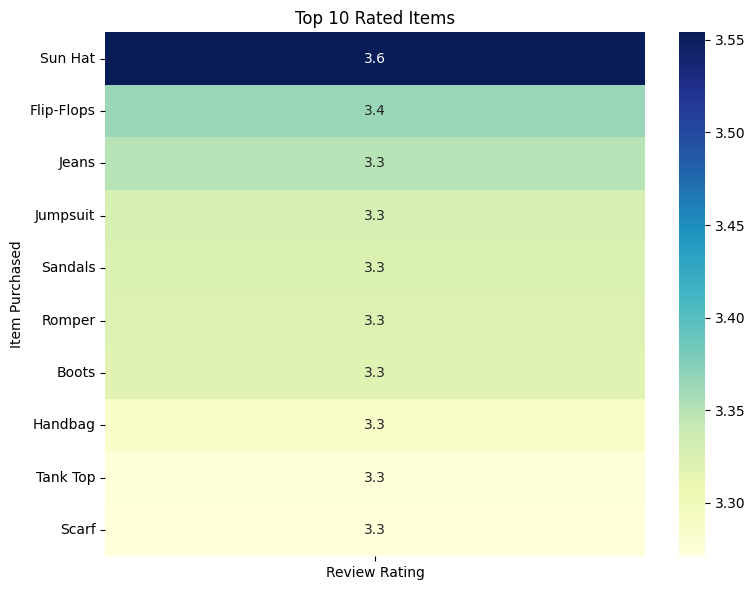

In [41]:
# --- Heatmap: Average Rating by Item ---
pivot_rating = df.pivot_table(index='Item Purchased', values='Review Rating', aggfunc='mean')
top_items_heatmap = pivot_rating.sort_values(by='Review Rating', ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.heatmap(top_items_heatmap, annot=True, cmap='YlGnBu')
plt.title("Top 10 Rated Items")
plt.tight_layout()
plt.show()

## **Recommendations**



1. The most purchased items include tops, jeans, and jackets — these could be prioritized in future inventory planning.


2. Credit Cards are the most preferred payment method, suggesting a tech-savvy customer base.


3. Monthly sales peaked in December, indicating strong holiday season demand. Promotional campaigns can be aligned accordingly.


4. Products with higher review ratings tend to be among the most purchased — quality directly impacts sales.


5. Consider focusing on low-rated but high-selling items for potential improvement in product quality.